# Nathan Fernandes
CS 688 Project

Project (ii)
The pose-output.csv file is the result of feeding many exercise videos file into a pose- estimation algorithm (i.e., posenet https://github.com/tensorflow/tfjs- models/tree/master/posenet).
Each exercise is a tensor (three-dimension data, i.e., x,y,z and time)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from pyts.approximation import SymbolicAggregateApproximation

In [ ]:
df = pd.read_csv("pose-output.csv")

# Let us Visualize the data

In [ ]:
exercise = "Triceps Kickbacks"

In [ ]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

df = df.drop(columns=['left_shoulder__left_wrist', 'right_wrist__left_wrist', 'left_elbow__left_wrist', 'right_elbow__right_wrist', 'left_hip__left_ankle', 'right_hip__right_ankle', 'right_wrist__right_shoulder', 'right_knee__left_knee', 'right_ankle__left_ankle', 'right_wrist__right_ankle', 'left_wrist__left_ankle', 'right_wrist__right_knee', 'left_wrist__left_knee'])

visualisation = df[df["name"] == exercise]

for i in range(1, len(list(visualisation.columns))):
  s = visualisation[visualisation.columns[i]].iloc[0]
  s = s[1:-2:]    
  s = s.split(",")  
  visualisation[visualisation.columns[i]].iloc[0] = s

from mpl_toolkits.mplot3d import Axes3D

def line_add(x1, y1, z1, x2, y2, z2):
  l = x2 - x1
  m = y2 - y1
  n = z2 - z1
  xl = np.linspace(x1, x2, num=100)
  yl = (m/l)*(xl - x1) + y1
  zl = (n/l)*(xl - x1) + z1
  return xl, yl, zl

for i in range(len(visualisation['xX_right_hip'].iloc[0])):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(-140, 60)

    ax.scatter(float(visualisation["xX_right_shoulder"].iloc[0][i]), float(visualisation["zZ_right_shoulder"].iloc[0][i]), -float(visualisation["yY_right_shoulder"].iloc[0][i]), c = 'red')
    ax.scatter(float(visualisation["xX_left_shoulder"].iloc[0][i]), float(visualisation["zZ_left_shoulder"].iloc[0][i]), -float(visualisation["yY_left_shoulder"].iloc[0][i]), c = 'red')

    ax.scatter(float(visualisation["xX_right_elbow"].iloc[0][i]), float(visualisation["zZ_right_elbow"].iloc[0][i]), -float(visualisation["yY_right_elbow"].iloc[0][i]), c='blue')
    ax.scatter(float(visualisation["xX_left_elbow"].iloc[0][i]), float(visualisation["zZ_left_elbow"].iloc[0][i]), -float(visualisation["yY_left_elbow"].iloc[0][i]), c='blue')

    ax.scatter(float(visualisation["xX_right_wrist"].iloc[0][i]), float(visualisation["zZ_right_wrist"].iloc[0][i]), -float(visualisation["yY_right_wrist"].iloc[0][i]), c='orange')
    ax.scatter(float(visualisation["xX_left_wrist"].iloc[0][i]), float(visualisation["zZ_left_wrist"].iloc[0][i]), -float(visualisation["yY_left_wrist"].iloc[0][i]), c='orange')

    ax.scatter(float(visualisation["xX_right_hip"].iloc[0][i]), float(visualisation["zZ_right_hip"].iloc[0][i]), -float(visualisation["yY_right_hip"].iloc[0][i]), c='green')
    ax.scatter(float(visualisation["xX_left_hip"].iloc[0][i]), float(visualisation["zZ_left_hip"].iloc[0][i]), -float(visualisation["yY_left_hip"].iloc[0][i]), c='green')

    ax.scatter(float(visualisation["xX_right_knee"].iloc[0][i]), float(visualisation["zZ_right_knee"].iloc[0][i]), -float(visualisation["yY_right_knee"].iloc[0][i]), c='black')
    ax.scatter(float(visualisation["xX_left_knee"].iloc[0][i]), float(visualisation["zZ_left_knee"].iloc[0][i]), -float(visualisation["yY_left_knee"].iloc[0][i]), c='black')

    ax.scatter(float(visualisation["xX_right_ankle"].iloc[0][i]), float(visualisation["zZ_right_ankle"].iloc[0][i]), -float(visualisation["yY_right_ankle"].iloc[0][i]), c='yellow')
    ax.scatter(float(visualisation["xX_left_ankle"].iloc[0][i]), float(visualisation["zZ_left_ankle"].iloc[0][i]), -float(visualisation["yY_left_ankle"].iloc[0][i]), c='yellow')

    # Create Lines

    a, b, c = line_add(float(visualisation["xX_right_elbow"].iloc[0][i]), float(visualisation["zZ_right_elbow"].iloc[0][i]), -float(visualisation["yY_right_elbow"].iloc[0][i]), float(visualisation["xX_right_wrist"].iloc[0][i]), float(visualisation["zZ_right_wrist"].iloc[0][i]), -float(visualisation["yY_right_wrist"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add(float(visualisation["xX_left_elbow"].iloc[0][i]), float(visualisation["zZ_left_elbow"].iloc[0][i]), -float(visualisation["yY_left_elbow"].iloc[0][i]), float(visualisation["xX_left_wrist"].iloc[0][i]), float(visualisation["zZ_left_wrist"].iloc[0][i]), -float(visualisation["yY_left_wrist"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    a, b, c = line_add(float(visualisation["xX_right_elbow"].iloc[0][i]), float(visualisation["zZ_right_elbow"].iloc[0][i]), -float(visualisation["yY_right_elbow"].iloc[0][i]), float(visualisation["xX_right_shoulder"].iloc[0][i]), float(visualisation["zZ_right_shoulder"].iloc[0][i]), -float(visualisation["yY_right_shoulder"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add(float(visualisation["xX_left_elbow"].iloc[0][i]), float(visualisation["zZ_left_elbow"].iloc[0][i]), -float(visualisation["yY_left_elbow"].iloc[0][i]), float(visualisation["xX_left_shoulder"].iloc[0][i]), float(visualisation["zZ_left_shoulder"].iloc[0][i]), -float(visualisation["yY_left_shoulder"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    a, b, c = line_add(float(visualisation["xX_right_knee"].iloc[0][i]), float(visualisation["zZ_right_knee"].iloc[0][i]), -float(visualisation["yY_right_knee"].iloc[0][i]), float(visualisation["xX_right_ankle"].iloc[0][i]), float(visualisation["zZ_right_ankle"].iloc[0][i]), -float(visualisation["yY_right_ankle"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add(float(visualisation["xX_left_knee"].iloc[0][i]), float(visualisation["zZ_left_knee"].iloc[0][i]), -float(visualisation["yY_left_knee"].iloc[0][i]), float(visualisation["xX_left_ankle"].iloc[0][i]), float(visualisation["zZ_left_ankle"].iloc[0][i]), -float(visualisation["yY_left_ankle"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    a, b, c = line_add(float(visualisation["xX_right_knee"].iloc[0][i]), float(visualisation["zZ_right_knee"].iloc[0][i]), -float(visualisation["yY_right_knee"].iloc[0][i]), float(visualisation["xX_right_hip"].iloc[0][i]), float(visualisation["zZ_right_hip"].iloc[0][i]), -float(visualisation["yY_right_hip"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')
    a, b, c = line_add(float(visualisation["xX_left_knee"].iloc[0][i]), float(visualisation["zZ_left_knee"].iloc[0][i]), -float(visualisation["yY_left_knee"].iloc[0][i]), float(visualisation["xX_left_hip"].iloc[0][i]), float(visualisation["zZ_left_hip"].iloc[0][i]), -float(visualisation["yY_left_hip"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    a, b, c = line_add(float(visualisation["xX_right_hip"].iloc[0][i]), float(visualisation["zZ_right_hip"].iloc[0][i]), -float(visualisation["yY_right_hip"].iloc[0][i]), float(visualisation["xX_left_hip"].iloc[0][i]), float(visualisation["zZ_left_hip"].iloc[0][i]), -float(visualisation["yY_left_hip"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    a, b, c = line_add(float(visualisation["xX_right_shoulder"].iloc[0][i]), float(visualisation["zZ_right_shoulder"].iloc[0][i]), -float(visualisation["yY_right_shoulder"].iloc[0][i]), float(visualisation["xX_left_shoulder"].iloc[0][i]), float(visualisation["zZ_left_shoulder"].iloc[0][i]), -float(visualisation["yY_left_shoulder"].iloc[0][i]))
    ax.plot3D(a, b, c, 'red')

    hip_mid_x = (float(visualisation["xX_right_hip"].iloc[0][i]) + float(visualisation["xX_left_hip"].iloc[0][i]))/2
    hip_mid_y = (float(visualisation["zZ_right_hip"].iloc[0][i]) + float(visualisation["zZ_left_hip"].iloc[0][i]))/2
    hip_mid_z = -(float(visualisation["yY_right_hip"].iloc[0][i]) + float(visualisation["yY_left_hip"].iloc[0][i]))/2

    shoulder_mid_x = (float(visualisation["xX_right_shoulder"].iloc[0][i]) + float(visualisation["xX_left_shoulder"].iloc[0][i]))/2
    shoulder_mid_y = (float(visualisation["zZ_right_shoulder"].iloc[0][i]) + float(visualisation["zZ_left_shoulder"].iloc[0][i]))/2
    shoulder_mid_z = -(float(visualisation["yY_right_shoulder"].iloc[0][i]) + float(visualisation["yY_left_shoulder"].iloc[0][i]))/2

    a, b, c = line_add(hip_mid_x, hip_mid_y, hip_mid_z, shoulder_mid_x + 0.25*(shoulder_mid_x - hip_mid_x), shoulder_mid_y + 0.25*(shoulder_mid_y - hip_mid_y), shoulder_mid_z + 0.25*(shoulder_mid_z - hip_mid_z))
    ax.plot3D(a, b, c, 'red')

    ax.set_xlabel("X_coordinate")
    ax.set_ylabel("Y_coordinate")
    ax.set_zlabel("Z_coordinate")

    plt.savefig(str(i)+'.png')

    plt.close()

a = list()

for i in range(len(visualisation['xX_right_hip'].iloc[0])):
  a.append(str(i) + '.png')

with imageio.get_writer('workout.gif', mode='I') as writer:
    for filename in a:
        image = imageio.imread(filename)
        writer.append_data(image)

print("A GIF has been saved to your local directory!")

import os

for filename in set(a):
    os.remove(filename)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


A GIF has been saved to your local directory!


Converting cell values from string to float

In [ ]:
for j in range(len(df)):
  for i in range(1, len(list(df.columns))):
    s = df[df.columns[i]][j]
    s = s[1:-2:]   
    s = s.split(",") 
    s = [float(x) for x in s]
    df[df.columns[i]][j] = s

In [ ]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,"[0.5418540835380554, 0.5442179441452026, 0.542...","[0.3002445101737976, 0.2985352575778961, 0.301...","[-0.012251616455614567, -0.014628192409873009,...","[0.5088052749633789, 0.5077652931213379, 0.508...","[0.3219769299030304, 0.3233363628387451, 0.320...","[-0.29006227850914, -0.3067556917667389, -0.29...","[0.5200956463813782, 0.5252318978309631, 0.518...","[0.43313315510749817, 0.43440017104148865, 0.4...","[0.023481255397200584, 0.027144629508256912, 0...","[0.48235487937927246, 0.4836348593235016, 0.48...","[0.4504028856754303, 0.4530404508113861, 0.452...","[-0.34773996472358704, -0.36112168431282043, -...","[0.5298163294792175, 0.5288264155387878, 0.522...","[0.5152466893196106, 0.5188010334968567, 0.516...","[-0.053506262600421906, -0.05365733057260513, ...","[0.4858378767967224, 0.48709478974342346, 0.48...","[0.5662975907325745, 0.567011833190918, 0.5698...","[-0.37318840622901917, -0.3764094412326813, -0...","[0.5519704818725586, 0.5512886643409729, 0.552...","[0.5113722085952759, 0.5112325549125671, 0.512...","[0.09740140289068222, 0.10304047912359238, 0.0...","[0.5347285866737366, 0.5333852767944336, 0.534...","[0.544847309589386, 0.5438390970230103, 0.5467...","[-0.0975169762969017, -0.10314539819955826, -0...","[0.6598052382469177, 0.6585541367530823, 0.660...","[0.48735326528549194, 0.48823118209838867, 0.4...","[0.07413876801729202, 0.07978099584579468, 0.0...","[0.6464101076126099, 0.6456512808799744, 0.646...","[0.525979220867157, 0.5270844101905823, 0.5269...","[-0.1422564834356308, -0.1523975282907486, -0....","[0.6857618689537048, 0.6853931546211243, 0.685...","[0.6739863157272339, 0.6749678254127502, 0.674...","[0.19033436477184296, 0.20084527134895325, 0.1...","[0.6738548278808594, 0.6742415428161621, 0.673...","[0.7142422795295715, 0.7170389890670776, 0.714...","[-0.026912769302725792, -0.030070703476667404,...","[0.21925508064526714, 0.22422574522063576, 0.2...","[0.3267062469411898, 0.328990478181663, 0.3284...","[0.11297876839533445, 0.11689902862586603, 0.1...","[0.11870693790317313, 0.11504417686981344, 0.1...","[0.23017388752729162, 0.23315023161325266, 0.2...","[0.23029485638792568, 0.2349012585971055, 0.23...","[0.25909465412553867, 0.25427671811613684, 0.2...","[0.2202232930928984, 0.23576031068245906, 0.22...","[0.22126598815086604, 0.2349819752379838, 0.22...","[0.4208857583322643, 0.4212868096159516, 0.419...","[0.3301144223315916, 0.33715394861846365, 0.33...","[0.28414532412631166, 0.27733679368033176, 0.2...","[0.18430521790866844, 0.18859900430098123, 0.1..."
1,hanging leg raises_4,"[0.5782945156097412, 0.5766435265541077, 0.578...","[0.26492059230804443, 0.26829394698143005, 0.2...","[0.23363590240478516, 0.2346416413784027, 0.17...","[0.3990108072757721, 0.39986276626586914, 0.39...","[0.2629733383655548, 0.2652568817138672, 0.267...","[0.18077099323272705, 0.21373336017131805, 0.1...","[0.5760862231254578, 0.5784265398979187, 0.580...","[0.1357021927833557, 0.139947772026062, 0.1494...","[0.12392085790634155, 0.08857688307762146, -0....","[0.40018072724342346, 0.39951637387275696, 0.4...","[0.13350796699523926, 0.13342714309692383, 0.1...",

Applying the SAX Algorithm to convert a list into a string

In [ ]:
def sax_algorithm(a):
  st = ""
  n = 5     # length of output string
  for i in range(n - 1):
    if float(a[int((i*len(a))/n)]) > (float(min(a)) + float(max(a)))/2:
      st = st + 'b'
    else:
      st = st + 's'
  if float(a[-1]) > (float(min(a)) + float(max(a)))/2:
    st = st + 'b'
  else:
    st = st + 's'  

  return st

In [ ]:
# Testing the SAX Algorithm

t = [3,2,1]
t = sax_algorithm(t)
print(t)

bbsss


In [ ]:
for i in range(1, 50):
  for j in range(0, len(df)):
    df.iloc[j,i] = sax_algorithm(df.iloc[j,i])

In [ ]:
df

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,bsbsb,sssbs,sbbbs,bsbsb,sssbs,sbbbb,bbssb,sssbb,sbbbs,bsssb,sssbs,sbbbb,sbssb,ssssb,sbbbs,bbbbs,ssbbb,sbbbb,bbbbs,sbssb,sssss,bbsbs,sbsss,bbbbb,bbsbs,bbsbs,bsbsb,bbsbs,bbsbs,bbsbb,sbbbs,bbsbs,bsssb,sbbbs,bbsbs,bsssb,ssssb,sbsbs,sbssb,bbbsb,bbsbs,sbsss,bbbsb,bsbss,bbsss,bssss,bbsbs,bsbsb,bsbsb
1,hanging leg raises_4,bbbbb,ssssb,bbbbb,bbbbs,ssssb,bbbbb,bbbbb,ssssb,bbbbb,sbsss,ssssb,bbbbb,bsbbs,ssssb,bsbbb,bbbbs,ssssb,bsbbb,bbbbb,ssssb,bbbsb,sssbs,ssssb,sssbs,bbbbb,ssssb,bbbbs,bbbbs,bbssb,bbbbs,bbbbb,bbbsb,bbbss,sssss,bbbsb,bbbss,sbsss,sssss,sbsss,sbsbb,sssss,sssss,sbsss,sssss,sssss,bssss,bssss,sssss,sssss
2,lat pull-downs (3),sssss,bbbbs,bbbbb,bbbbb,bbbbs,bsbbb,sssss,sbbbs,bsbbb,bbbbb,ssbbs,ssbbs,sssss,ssbbs,ssbbb,bbbbb,ssbbs,sssbs,sssss,bbbbs,ssssb,bbbbb,bbbbs,bbbbs,sbsss,bbbbb,bbbbs,bbbbb,sbbbb,bbbbs,sssss,bbbbb,bssbs,bbsbb,sbbbb,bbsbs,sssbs,bbbbb,sssbs,sssss,bssbs,bbsbs,sssss,ssssb,sssss,bbssb,bssss,bbssb,bbsss
3,The Deadlift,bbbsb,bsbsb,sbbbs,ssbbs,bsbsb,sbbbs,bbssb,bsbsb,sbbbs,ssbbs,bsbsb,sbbss,bbssb,bsbsb,ssbbs,ssbbs,bsbsb,sbbbs,bbsbb,bsssb,ssbbs,sssbs,bsssb,bbssb,bbbbb,bbbsb,sbbbs,ssbbs,bbbbb,sbbbs,bbsbb,bbsbb,sbbbs,ssbbs,bbbbb,sbbbs,bbbbb,sssbs,sbbss,bbbbb,sbsbs,bbbbb,bbbbb,ssbss,sssbs,sbsbb,sbsbs,sbsbs,sbsbs
4,seated rows (4),bbsss,sbbbb,sbsss,bbsss,bssbs,sssss,bbsss,bbbbb,bbbss,bbsss,ssbbb,sssss,bbsss,bbbbb,bbbss,bbsss,bssbb,bbsss,bbsss,ssbbb,bbsss,bbsss,bsbbb,ssbbb,sbbbb,sssss,bssss,bbbbb,ssbbb,bssbb,sbbbb,ssbbb,bssbb,bbbbb,bbbbb,bsbbb,sssss,sbsss,sssbs,bbsbs,bsbbb,bsbbb,bbbbs,bssss,bssss,ssbbb,sssbb,sssbb,sssbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,standing cable push downs triceps workout (abo...,bssbs,bssbs,bssss,bbbbs,bssbs,bssbb,bssbs,bbbbs,bsssb,bssbb,bbbbs,bbsss,bbsbs,sbbbb,sbbbb,bbsbb,sbbbs,bbbss,bbbbs,bssbs,sssss,bbbbs,bssbs,bbbbb,bbbss,bssbb,sbbss,bbbss,bssbb,sbbss,bbbss,bssbs,sbbss,bbbss,bssbb,sbbss,bssss,ssbbb,bssss,bssbs,sbbss,sbbss,ssssb,ssbss,ssbss,sssbb,sbbbs,sssbb,bbsbs
220,Rope Push Downs- Supinated,ssssb,bbbbs,bsbbb,ssssb,bbbbs,ssssb,ssssb,bbbbs,sbssb,ssssb,bbsbs,sssbb,ssssb,sbsss,sbsss,ssssb,sbsss,ssbbs,ssssb,bbbbs,bbbbs,ssssb,bbbbs,ssssb,ssssb,ssssb,bbbbs,ssssb,ssssb,sbssb,ssssb,ssssb,sbbbs,ssssb,ssssb,ssssb,bsbsb,sbsss,bsbbb,ssssb,ssssb,ssssb,ssssb,bbbbs,bbbbs,bsssb,bsbbb,bsbbb,bsbbb
221,Tricep Kickbacks 2,bsbsb,bbbss,bsbbb,bssss,bbsbs,bsbbb,bbsss,ssbss,bssss,bsssb,bbsbs,bssbs,bbsbs,ssbss,bssss,bbsbs,bbsbs,bbsbs,bbbbs,ssbss,ssbsb,bbsbs,sssss,bbsbs,bbbss,bsbss,sssbs,bbsbs,bssbs,sbsss,bbsss,bsbsb,sssbb,bbsss,bsbbb,sbssb,ssbss,bbbbb,sssss,bbsbs,ssssb,bsbbs,ssbsb,ssbbs,ssbbb,bsbbb,bssbs,bsbsb,bssbs
222,Triceps Kickbacks,ssbbb,sssss,bssbs,sbsbs,bbbbb,bbbbb,bbbbb,bbbbb,bssbs,sbsbs,bsbbb,bbbbb,sssss,bbbbb,bbbbb,sssss,bbbbb,bbbbb,bsbbb,sssss,sssss,ssbss,bbbbb,bbbbb,sbsss,bssbb,bsbbb,bbsbb,bssss,ssbss,bssss,bbbss,bsbbb,bssbb,bbbbb,sssss,sssss,sssss,sssss,sbsss,sssss,bbsbb,sbsss,sssss,sssss,bbbbb,sssss,bbbbb,sssss


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding

labelencoder = LabelEncoder()

for i in range(1, 50):
  df.iloc[:,i] = labelencoder.fit_transform(df.iloc[:,i])

In [ ]:
df

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,9,29,17,10,29,15,5,27,17,14,28,16,21,30,17,1,23,16,1,21,31,5,23,0,5,5,10,5,5,4,17,5,14,17,5,14,30,20,22,2,5,23,2,10,7,15,5,10,10
1,hanging leg raises_4,0,30,0,1,30,0,0,29,0,23,29,0,9,30,8,1,29,8,0,29,2,29,30,29,0,29,1,1,6,1,0,2,3,30,2,3,23,30,23,20,30,31,23,29,29,15,15,29,30
2,lat pull-downs (3),29,1,0,0,1,7,29,17,8,0,24,25,30,25,24,0,24,29,29,1,30,0,1,1,23,0,1,0,16,1,29,0,13,4,16,5,29,0,29,31,12,5,31,28,29,6,15,6,7
3,The Deadlift,2,10,17,25,10,16,5,10,17,25,10,19,6,10,25,24,10,17,4,14,25,29,14,6,0,2,17,24,0,17,4,4,17,24,0,17,0,28,19,0,20,0,0,25,27,20,21,20,20
4,seated rows (4),7,16,23,7,13,30,6,0,3,7,23,31,7,0,3,7,12,7,7,23,7,7,8,24,16,30,15,0,24,12,16,22,12,0,0,8,31,22,29,5,8,8,1,14,14,24,28,26,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,standing cable push downs triceps workout (abo...,12,13,15,1,13,11,11,1,14,12,1,7,5,16,16,4,17,3,1,13,31,1,13,0,3,12,19,3,12,19,3,13,19,3,12,19,15,23,15,13,18,19,30,25,25,28,17,26,5
220,Rope Push Downs- Supinated,28,1,8,30,1,29,28,1,22,30,5,28,29,23,23,29,22,25,28,1,1,30,1,30,30,29,1,29,30,22,28,28,17,29,30,30,10,22,8,30,29,30,30,1,1,14,8,8,8
221,Tricep Kickbacks 2,9,3,8,15,5,7,6,26,15,14,5,13,5,27,15,5,5,5,1,26,26,5,31,5,3,11,28,5,13,23,7,10,28,7,8,22,27,0,31,5,29,9,26,23,22,8,13,10,13
222,Triceps Kickbacks,23,31,13,21,0,0,0,0,13,21,8,0,30,0,0,30,0,0,8,30,31,27,0,0,23,12,8,4,15,27,15,3,8,12,0,31,31,30,31,23,30,4,23,29,29,0,31,0,30


In [ ]:
def MinMaxScl(a):
  k = max(a)
  n = a/k
  return n

In [ ]:
# Min Max Scaling

for i in range(1, 50):
  df.iloc[:,i] = MinMaxScl(df.iloc[:,i])

In [ ]:
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,yY_right_elbow,zZ_right_elbow,xX_left_wrist,yY_left_wrist,zZ_left_wrist,xX_right_wrist,yY_right_wrist,zZ_right_wrist,xX_left_hip,yY_left_hip,zZ_left_hip,xX_right_hip,yY_right_hip,zZ_right_hip,xX_left_knee,yY_left_knee,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,left_shoulder__left_wrist,right_wrist__left_wrist,left_elbow__left_wrist,right_elbow__right_wrist,left_hip__left_ankle,right_hip__right_ankle,right_wrist__right_shoulder,right_knee__left_knee,right_ankle__left_ankle,right_wrist__right_ankle,left_wrist__left_ankle,right_wrist__right_knee,left_wrist__left_knee
0,Seated Jackknife,0.310345,0.935484,0.548387,0.322581,0.935484,0.500000,0.172414,0.900000,0.548387,0.451613,0.933333,0.516129,0.700000,0.967742,0.548387,0.033333,0.766667,0.516129,0.034483,0.700000,1.000000,0.161290,0.741935,0.000000,0.161290,0.166667,0.333333,0.166667,0.161290,0.129032,0.586207,0.172414,0.451613,0.566667,0.161290,0.451613,0.967742,0.666667,0.709677,0.064516,0.166667,0.741935,0.064516,0.344828,0.241379,0.483871,0.161290,0.344828,0.333333
1,hanging leg raises_4,0.000000,0.967742,0.000000,0.032258,0.967742,0.000000,0.000000,0.966667,0.000000,0.741935,0.966667,0.000000,0.300000,0.967742,0.258065,0.033333,0.966667,0.258065,0.000000,0.966667,0.064516,0.935484,0.967742,0.935484,0.000000,0.966667,0.033333,0.033333,0.193548,0.032258,0.000000,0.068966,0.096774,1.000000,0.064516,0.096774,0.741935,1.000000,0.741935,0.645161,1.000000,1.000000,0.741935,1.000000,1.000000,0.483871,0.483871,1.000000,1.000000
2,lat pull-downs (3),1.000000,0.032258,0.000000,0.000000,0.032258,0.233333,1.000000,0.566667,0.258065,0.000000,0.800000,0.806452,1.000000,0.806452,0.774194,0.000000,0.800000,0.935484,1.000000,0.033333,0.967742,0.000000,0.032258,0.032258,0.741935,0.000000,0.033333,0.000000,0.516129,0.032258,1.000000,0.000000,0.419355,0.133333,0.516129,0.161290,0.935484,0.000000,0.935484,1.000000,0.400000,0.161290,1.000000,0.965517,1.000000,0.193548,0.483871,0.206897,0.233333
3,The Deadlift,0.068966,0.322581,0.548387,0.806452,0.322581,0.533333,0.172414,0.333333,0.548387,0.806452,0.333333,0.612903,0.200000,0.322581,0.806452,0.800000,0.333333,0.548387,0.137931,0.466667,0.806452,0.935484,0.451613,0.193548,0.000000,0.066667,0.566667,0.800000,0.000000,0.548387,0.137931,0.137931,0.548387,0.800000,0.000000,0.548387,0.000000,0.933333,0.612903,0.000000,0.666667,0.000000,0.000000,0.862069,0.931034,0.645161,0.677419,0.689655,0.666667
4,seated rows (4),0.241379,0.516129,0.741935,0.225806,0.419355,1.000000,0.206897,0.000000,0.096774,0.225806,0.766667,1.000000,0.233333,0.000000,0.096774,0.233333,0.400000,0.225806,0.241379,0.766667,0.225806,0.225806,0.258065,0.774194,0.516129,1.000000,0.500000,0.000000,0.774194,0.387097,0.551724,0.758621,0.387097,0.000000,0.000000,0.258065,1.000000,0.733333,0.935484,0.161290,0.266667,0.258065,0.032258,0.482759,0.482759,0.774194,0.903226,0.896552,0.933333


# Applying three dimensionality reduction methods on the tensors (PCA, tSNE and UMAP)

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=4)

x = df.loc[:, list(df.columns[1:])].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['1', '2', '3', '4'])
pca.explained_variance_ratio_

array([0.09317908, 0.08734419, 0.08426905, 0.07551819])

This tells us that about 40% of my data is explained by these columns

In [ ]:
df_reduced_pca = principalDf[['1', '2', '3', '4']]

In [ ]:
y_pca = df_reduced_pca.loc[:, list(df_reduced_pca.columns)].values

In [ ]:
df_reduced_pca.head()

,1,2,3,4
0,-0.495803,-0.650966,-1.043482,-0.421001
1,0.370074,-0.004131,-1.276891,-0.104380
2,-0.475456,-0.403056,0.279031,0.197623
3,-1.046552,0.033874,0.241260,-0.536505
4,-0.334595,-0.182503,-0.346263,1.353496


## t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=0, perplexity=60, n_iter=300)

df_reduced_tsne = tsne.fit_transform(x)

df_reduced_tsne = pd.DataFrame(df_reduced_tsne) 

df_reduced_tsne.columns = ['X1', 'X2', 'X3']

print(df_reduced_tsne.head())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


           X1          X2         X3
0  -21.390097  -12.799707   0.611346
1   30.237854    5.636030   9.949142
2   20.254341   -2.305210  25.210854
3 -114.497520 -218.646942 -29.627220
4   -2.066069   22.808851   5.221035


In [ ]:
df_reduced_tsne.head()

,X1,X2,X3
0,-21.390097,-12.799707,0.611346
1,30.237854,5.636030,9.949142
2,20.254341,-2.305210,25.210854
3,-114.497520,-218.646942,-29.627220
4,-2.066069,22.808851,5.221035


In [ ]:
y_tsne = df_reduced_tsne.loc[:, list(df_reduced_tsne.columns)].values

## UMAP

In [ ]:
import umap

Umap = umap.UMAP(random_state=42,n_components=6)

df_reduced_umap = Umap.fit_transform(x)
df_reduced_umap =pd.DataFrame(df_reduced_umap)

df_reduced_umap.columns = ['X1','X2', 'X3', 'X4', 'X5', 'X6']
print(df_reduced_umap.head())

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


         X1        X2        X3        X4        X5        X6
0  7.065217  2.596965  4.275229  6.042757  6.458642  2.795884
1  6.797726  1.440076  4.606542  7.018480  5.363393  2.988729
2  6.844159  3.027996  4.675896  6.940235  5.777312  2.218134
3  7.192800  3.162728  4.993250  6.599607  5.837102  3.593047
4  7.018683  1.730719  4.629428  7.404558  7.512997  2.805320


In [ ]:
for i in list(df_reduced_umap.columns):
  df_reduced_umap[i] = df_reduced_umap[i]/max(df_reduced_umap[i])

In [ ]:
y_umap = df_reduced_umap.loc[:, list(df_reduced_umap.columns)].values

In [ ]:
df_reduced_umap.head()

,X1,X2,X3,X4,X5,X6
0,0.859735,0.757270,0.657239,0.750729,0.859663,0.671325
1,0.827186,0.419923,0.708172,0.871949,0.713882,0.717629
2,0.832836,0.882958,0.718834,0.862229,0.768976,0.532600
3,0.875260,0.922245,0.767622,0.819910,0.776934,0.862733
4,0.854073,0.504674,0.711691,0.919914,1.000000,0.673590


#  Experiment with different clustering methods

## K means

In [ ]:
import copy

def cluster_kmeans(df_k, clusters, y):

  from sklearn.cluster import KMeans
  kmeans_classifier = KMeans(n_clusters = clusters)
  y_means = kmeans_classifier.fit_predict(y)
  df_new = copy.deepcopy(df_k)
  df_new["Cluster"] = y_means
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize = (8,8))

  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_new[list(df_new.columns)[0]], df_new[list(df_new.columns)[1]], df_new[list(df_new.columns)[2]], c = df_new['Cluster'])
  ax.view_init(-140, 60)
  plt.show()
  return df_new

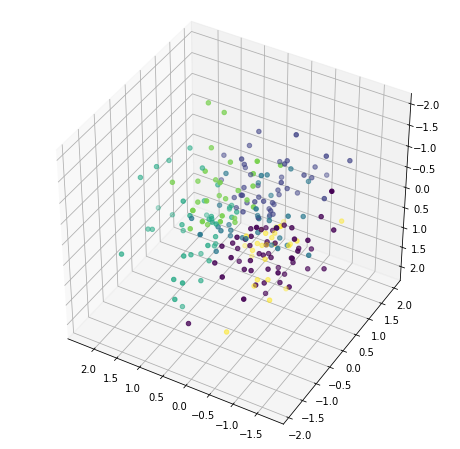

In [ ]:
df_pca_kmeans = cluster_kmeans(df_reduced_pca, 6, y_pca)

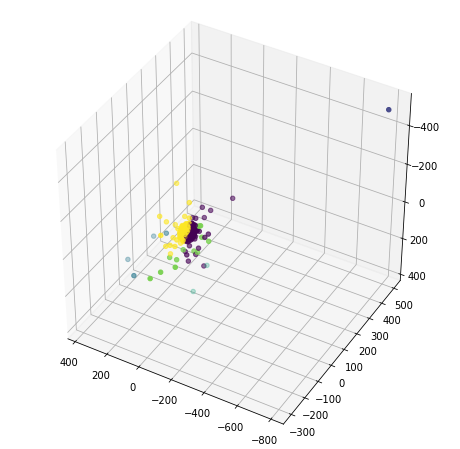

In [ ]:
df_tsne_kmeans = cluster_kmeans(df_reduced_tsne, 6, y_tsne)

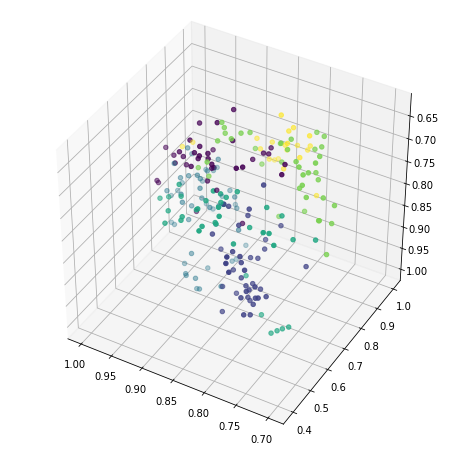

In [ ]:
df_umap_kmeans = cluster_kmeans(df_reduced_umap, 6, y_umap)

## Hierarchical Clustering

In [ ]:
def cluster_hierarchical(df_h, clusters, y):

  import scipy.cluster.hierarchy as shc
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms")  
  dend = shc.dendrogram(shc.linkage(df_h, method='ward'))
  plt.axhline(y=5, color='r', linestyle='--')

  from sklearn.cluster import AgglomerativeClustering
  cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')  
  df_newest = copy.deepcopy(df_h)
  df_newest["Cluster"] = cluster.fit_predict(y)

  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Cluster'])
  ax.view_init(-140, 60)
  plt.show()
  return df_newest

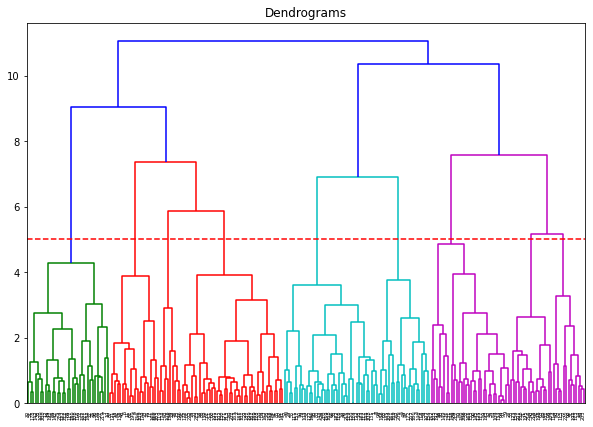

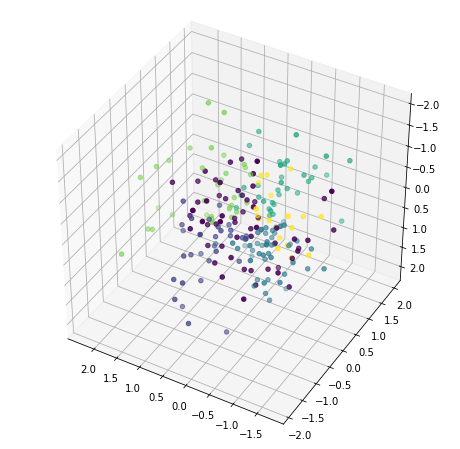

In [ ]:
df_pca_hierarchy = cluster_hierarchical(df_reduced_pca, 6, y_pca)

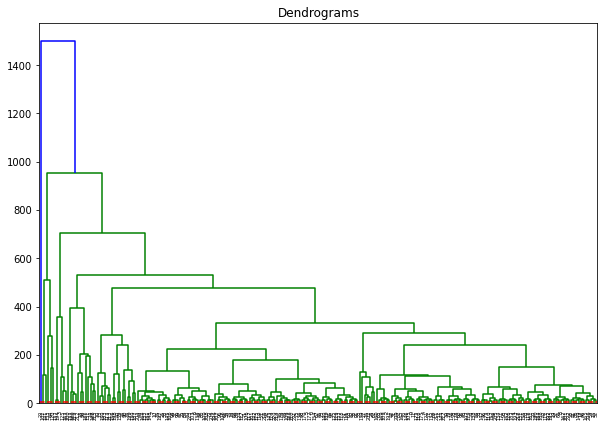

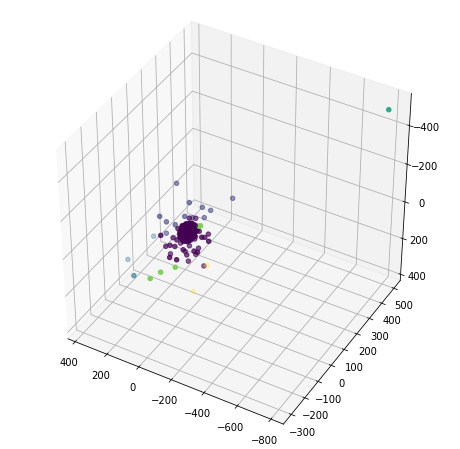

In [ ]:
df_tsne_hierarchy = cluster_hierarchical(df_reduced_tsne, 6, y_tsne)

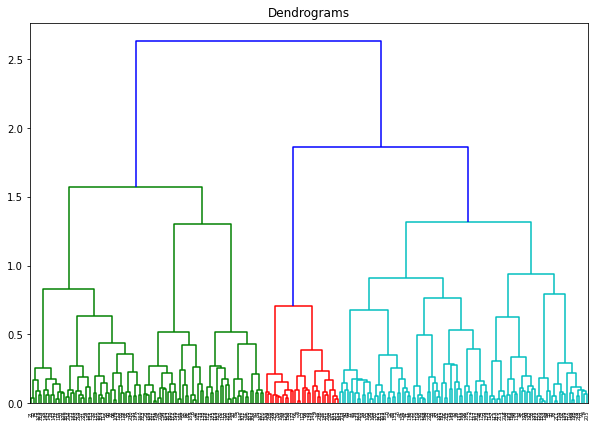

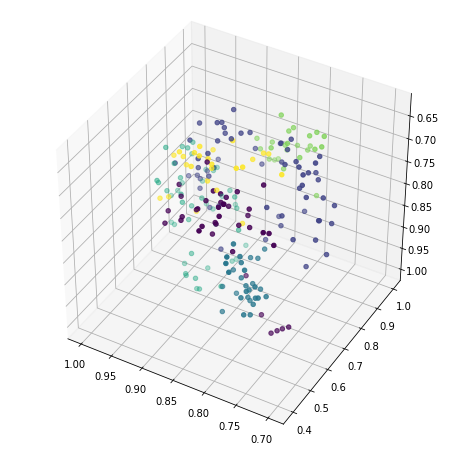

In [ ]:
df_umap_hierarchy = cluster_hierarchical(df_reduced_umap, 6, y_umap)

## DB Scan

In [ ]:
# Writing a function to plot DB Scan 

def cluster_dbscan(df_d, ep = 0.2, minpts = 10):
  from sklearn.cluster import DBSCAN
  # Numpy array of all the cluster labels assigned to each data point
  db_default = DBSCAN(eps = ep, min_samples = minpts).fit(df_d)
  df_newest = copy.deepcopy(df_d)
  df_newest["Cluster"] = db_default.labels_

  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(-140, 60)
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Cluster'])
  
  plt.show()
  return df_newest

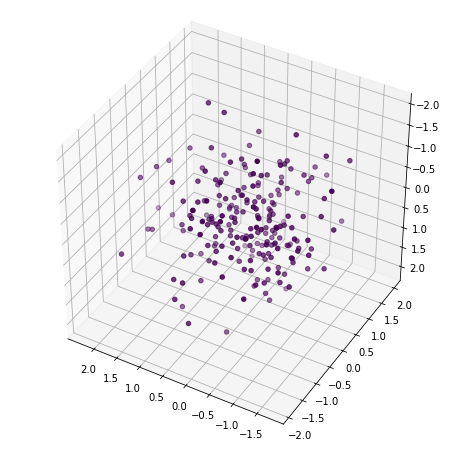

In [ ]:
df_pca_dbscan = cluster_dbscan(df_reduced_pca, ep = 0.275, minpts = 10)

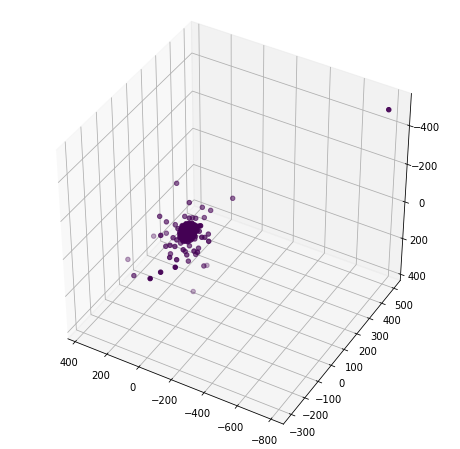

In [ ]:
df_tsne_dbscan = cluster_dbscan(df_reduced_tsne)

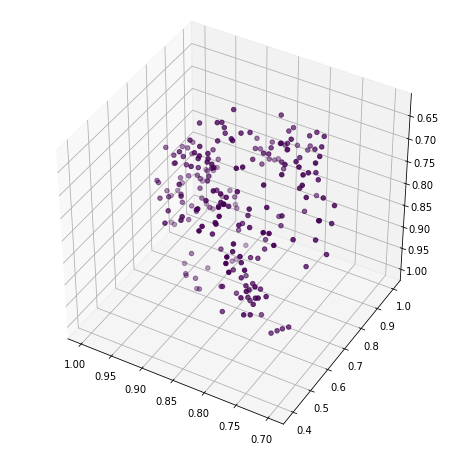

In [ ]:
df_umap_dbscan = cluster_dbscan(df_reduced_umap, ep = 0.02, minpts=10)

## Fuzzy-C Means

In [ ]:
def cluster_fuzzyc(df_d, clusters, y):
 
  from fcmeans import FCM
  fcm = FCM(n_clusters=clusters)
  fcm.fit(y)
  fcm_centers = fcm.centers
  fcm_labels = fcm.predict(y)
  df_newest = copy.deepcopy(df_d)
  df_newest["Cluster"] = fcm_labels
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df_newest[list(df_newest.columns)[0]], df_newest[list(df_newest.columns)[1]], df_newest[list(df_newest.columns)[2]], c = df_newest['Cluster'])
  ax.view_init(-140, 60)
  plt.show()
  return df_newest

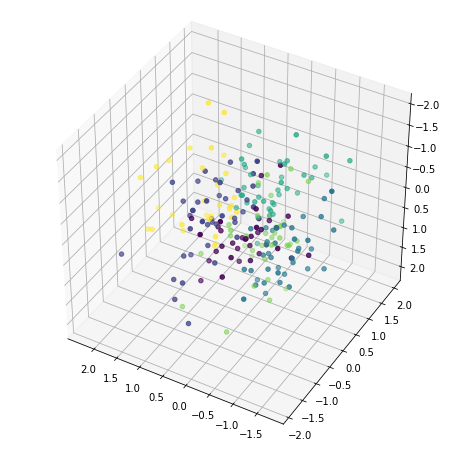

In [ ]:
df_pca_fuzzy = cluster_fuzzyc(df_reduced_pca, 6, y_pca)

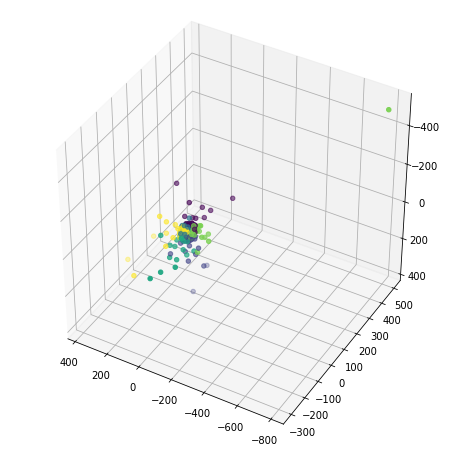

In [ ]:
df_tsne_fuzzy = cluster_fuzzyc(df_reduced_tsne, 6, y_tsne)

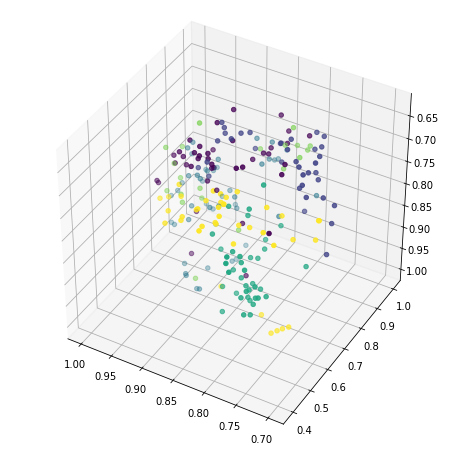

In [ ]:
df_umap_fuzzy = cluster_fuzzyc(df_reduced_umap, 6, y_umap)

# Evaluating the Best Model

In [ ]:
bench = ["Bench Press", "bench presses", "bench press", "bench presses (1)", "bench presses (3)", "bench presses (4)", "bench presses (5)"]
index_of_bench = []

squat = ["squats (1)", "squats (2)", "squats (3)", "squats (4)"]
index_of_squat = []

for i in range(len(df)):
  elif df["name"].iloc[i] in bench:
    index_of_bench.append(i)
  elif df["name"].iloc[i] in squat:
    index_of_squat.append(i)

[3, 7, 46, 47] [9, 12, 15, 32, 36, 48, 56] [111, 113, 114, 116] [1, 8, 38, 43, 51, 52, 53]


In [ ]:
def check_cluster(df):
  print("Bench Presses:")
  print(list(df["Cluster"][index_of_bench]))
  print("\nSquats:")
  print(list(df["Cluster"][index_of_squat]))

## PCA reduction with:

### K Means

In [ ]:
check_cluster(df_pca_kmeans)

Bench Presses:
[3, 1, 3, 3, 0, 3, 3]

Squats:
[4, 3, 0, 4]


### Heirarchial Clustering

In [ ]:
check_cluster(df_pca_hierarchy)

Bench Presses:
[4, 3, 4, 4, 0, 1, 1]

Squats:
[0, 1, 1, 0]


### DB Scan

In [ ]:
check_cluster(df_pca_dbscan)

Bench Presses:
[-1, -1, -1, -1, -1, -1, -1]

Squats:
[-1, -1, -1, -1]


### Fuzzy-C Means

In [ ]:
check_cluster(df_pca_fuzzy)

Bench Presses:
[5, 3, 5, 5, 1, 1, 0]

Squats:
[1, 1, 1, 1]


## TSNE reduction with:

### K Means

In [ ]:
check_cluster(df_tsne_kmeans)

Bench Presses:
[0, 0, 5, 0, 0, 0, 0]

Squats:
[0, 0, 0, 0]


### Heirarchial Clustering

In [ ]:
check_cluster(df_tsne_hierarchy)

Bench Presses:
[0, 0, 0, 0, 0, 0, 0]

Squats:
[0, 0, 0, 0]


### DB Scan

In [ ]:
check_cluster(df_tsne_dbscan)

Bench Presses:
[-1, -1, -1, -1, -1, -1, -1]

Squats:
[-1, -1, -1, -1]


### Fuzzy-C Means

In [ ]:
check_cluster(df_tsne_fuzzy)

Bench Presses:
[1, 4, 5, 4, 2, 3, 1]

Squats:
[2, 1, 3, 0]


## UMAP reduction with:

### K Means

In [ ]:
check_cluster(df_umap_kmeans)

Bench Presses:
[1, 2, 1, 4, 0, 4, 3]

Squats:
[5, 3, 3, 1]


### Heirarchial Clustering

In [ ]:
check_cluster(df_umap_hierarchy)

Bench Presses:
[2, 3, 1, 1, 1, 1, 0]

Squats:
[4, 0, 0, 0]


### DB Scan

In [ ]:
check_cluster(df_umap_dbscan)

Bench Presses:
[-1, -1, -1, -1, -1, -1, -1]

Squats:
[-1, -1, -1, -1]


### Fuzzy-C Means

In [ ]:
check_cluster(df_umap_fuzzy)

Bench Presses:
[3, 2, 3, 1, 0, 1, 5]

Squats:
[4, 5, 0, 3]


The Best Model according to me is **t-SNE with Heirarchial Clustering**